In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
def scaling(image):
    return (image - np.min(image)) * 255 / (np.max(image) - np.min(image))

def padding(input_img, a, b):
    nrows, ncols =  input_img.shape
    input_img =  np.concatenate((input_img, np.zeros([a, ncols])), axis=0)
    input_img =  np.concatenate((np.zeros([a, ncols]), input_img), axis=0)
    input_img =  np.concatenate((np.zeros([nrows+2*b, b]), input_img), axis=1)
    input_img =  np.concatenate(( input_img, np.zeros([nrows+2*b, b])), axis=1)
    
    return input_img

def unpadding(img, a,b):
    return img[a:img.shape[0]-a, b:img.shape[1]-b]

def conv(kernel, image):
    a = int((kernel.shape[0] - 1)/2)
    b = int((kernel.shape[1] - 1)/2)
    
    #padding the input image
    image = padding(image, a, b)
    new_image = np.zeros(image.shape)
    
    for x in range(a,image.shape[0]-a):
        for y in range(b,image.shape[1]-b):
            neighborhood = image[x-a:x+a+1, y-b:y+b+1]
            value = (np.sum(np.multiply(neighborhood, kernel)))
            new_image[x,y] = value
            
    return unpadding(image, a, b) ,unpadding(new_image, a, b)


def laplacian_filter(kernel, image, c):
    # Convolving the original image 
    image,new_image = conv(kernel, image)
    
    # Scaling the filtered image If , using normalization(0 - 255)
    new_image = scaling(new_image)
    
    # Adding the filtered image, multiplied by the parameter c, back to the original image.
    new_image = new_image*c + image

    # Scaling the filtered image If , using normalization(0 - 255)
    new_image = scaling(new_image)
    
    return image,new_image.astype(np.uint8)

In [3]:
kernels = {}
kernels[1] = np.matrix([[0,-1,0], [-1,4,-1], [0, -1, 0]])
kernels[2] = np.matrix([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

In [4]:
image = imageio.imread("../images/arara.png")

In [5]:
image_name = input().rstrip()
method = int(input())
save = int(input())
image = imageio.imread(f"../images/{image_name}")
if method == 2:
    c = float(input())
    k = int(input())
    image , filtered_image = laplacian_filter(kernels[k], image, c)    

arara.png
2
1
0.5
1


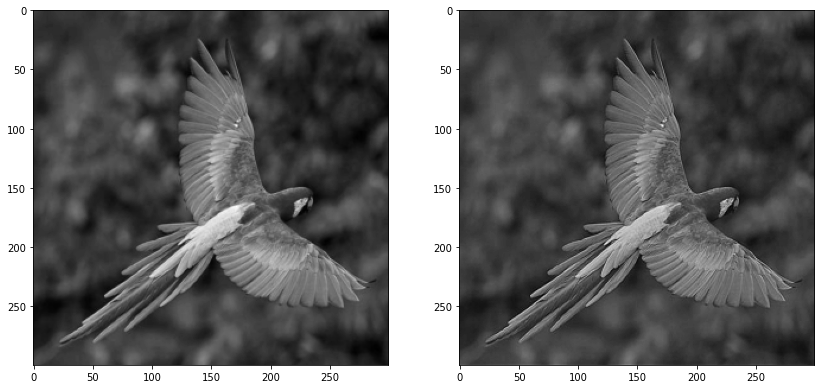

In [6]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(image, cmap="gray")

plt.subplot(122)
plt.imshow(filtered_image, cmap="gray")

In [7]:
#ERRO 
## Result caso 1: 3429.3622
rse = np.sqrt(np.sum((image.astype(float) - filtered_image.astype(float))**2))

# Printing the error rounding to 4 decimal places.
print('{:.4f}'.format(rse))

2490.2727
